In [23]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [24]:
from zipfile import ZipFile
file_name = '/content/Data.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [25]:
img_Train = np.ones([2400, 784])
for i in range(2400): 
  path = '/content/Data/Train/' + str(i+1) + ".jpg"
  img = Image.open(path)
  img_Train[i] = np.array(img).flatten()

img_test = np.ones([200, 784])
for i in range(200):
  path = '/content/Data/Test/' + str(i+1) + ".jpg"
  img = Image.open(path)
  img_test[i] = np.array(img).flatten()

In [26]:
def getClass(n, img):
  arr = np.zeros([240, 784])
  for j in range(240):
    arr[j] = img[(n * 240)+j]
  return arr

In [27]:
def getOtherClasses(n, train):
  arr = []
  for i in range(240):
    arr.append((n * 240) + i)
  im = np.delete(train, arr, axis = 0)
  return im

In [28]:
def getMean(arr):
  sum = np.zeros([784])
  for i in range(len(arr)):
    sum += arr[i]
  return sum / len(arr)

In [35]:
def fitWithNObias(img):
  WT = []
  noBias = np.zeros([200])
  for i in range(10):
    c1 = getClass(i, img)
    c2 = getOtherClasses(i, img)
    m1 = getMean(c1)
    m2 = getMean(c2)
    s1 = np.dot( np.transpose(np.subtract(c1, m1)), np.subtract(c1, m1) )
    s2 = np.dot( np.transpose(np.subtract(c2, m2)), np.subtract(c2, m2) )
    swInv = np.linalg.pinv(np.add(s1, s2))

    w = np.dot((np.subtract(m2, m1)), (swInv))
    wt = np.transpose(w)
    WT.append(wt)

  for i in range(200):
    Pnobias = []
    for j in range(10):
      p = np.dot(img_test[i], WT[j])
      Pnobias.append(p)
    min1 = np.amin(Pnobias)
    index1 = np.where(Pnobias == min1)
    noBias[i] = index1[0][0]
  return(noBias)

In [47]:
def fitWithBias(img):
  W0 = []
  WT = []
  Bias = np.zeros([200])
  for i in range(10):
    c1 = getClass(i, img)
    c2 = getOtherClasses(i, img)
    m1 = getMean(c1)
    m2 = getMean(c2)
    s1 = np.dot( np.transpose(np.subtract(c1, m1)), np.subtract(c1, m1) )
    s2 = np.dot( np.transpose(np.subtract(c2, m2)), np.subtract(c2, m2) )
    swInv = np.linalg.pinv(np.add(s1, s2))

    w = np.dot((np.subtract(m2, m1)), (swInv))
    wt = np.transpose(w)
    WT.append(wt)
    w0 = (-1/2) * np.dot((np.add(m1, m2)), wt)
    W0.append(w0)

  for i in range(200):
    Pbias = []
    for j in range(10):
      p = np.dot(img_test[i], WT[j])
      Pbias.append( np.add(p, W0[j]) )
    min2 = np.amin(Pbias)
    index2 = np.where(Pbias == min2)
    Bias[i] = index2[0][0]
  return(Bias)

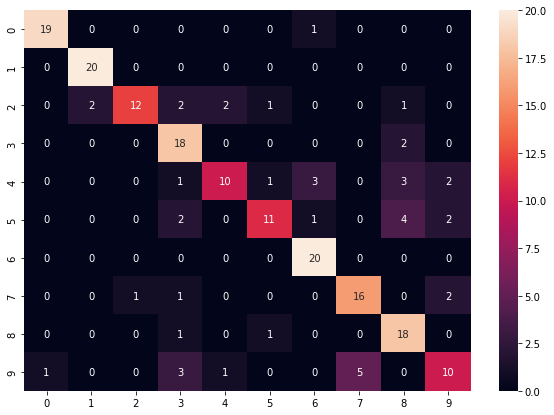

In [46]:
test_Labels = np.genfromtxt("/content/Data/Test/Test Labels.txt", delimiter = ",")
cfm = confusion_matrix(test_Labels, fitWithNObias(img_Train))
classes = ["0", "1", "2","3", "4", "5","6", "7", "8", "9"]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("ConfusionNoBias.jpg")

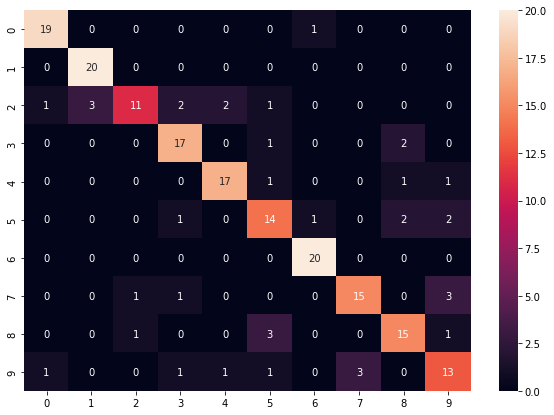

In [48]:
cfm = confusion_matrix(test_Labels, fitWithBias(img_Train))
classes = ["0", "1", "2","3", "4", "5","6", "7", "8", "9"]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("ConfusionWithBias.jpg")

In [49]:
print('without bias term =', accuracy_score(fitWithNObias(img_Train),test_Labels)*100, '%')

print('with bias term =', accuracy_score(fitWithBias(img_Train),test_Labels)*100, '%')

without bias term = 77.0 %
with bias term = 80.5 %


Yes bias term affected the accuracy as it increases the accuracy from 77% to 80.5%